In [102]:
import numpy as np
import matplotlib.pyplot as plt

In [103]:
X = np.empty((100, 2))   # 里面的数字应该是内存的原本内容
X[:,0] = np.random.uniform(0., 100., size=100)   # 0 - 100 的实数
X[:,1]  = 0.75 * X[:,0] + 3. + np.random.normal(0, 5 , size=100)

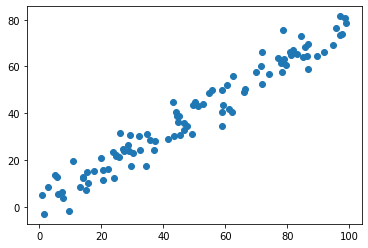

In [104]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [105]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
pca.fit(X)
X_reduction = pca.transform(X)
X_restore = pca.inverse_transform(X_reduction)

In [106]:
print(X.shape)
print(X_reduction.shape)
print(X_restore.shape)

(100, 2)
(100, 1)
(100, 2)


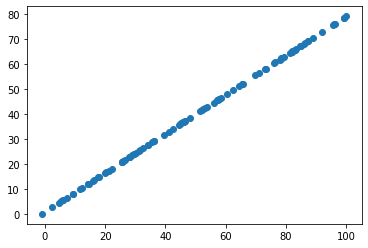

In [107]:
plt.scatter(X_restore[:,0], X_restore[:,1])
plt.show()

In [ ]:
### 丢失的信息很有可能大部分是噪音

## 手写识别的例子

In [109]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target

In [110]:
noisy_digits = X + np.random.normal(0, 4, size=X.shape)

In [111]:
example_digits = noisy_digits[y==0,:][:10]
for num in range(1, 10):
    X_num = noisy_digits[y==num,:][:10]
    example_digits = np.vstack([example_digits, X_num]) # 行增大的方向

In [94]:
example_digits.shape

(100, 64)

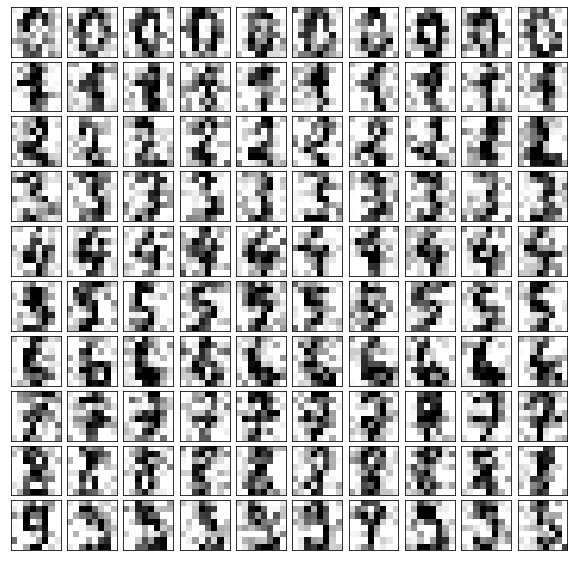

In [97]:
# 一幅图中绘制多张子图

def plot_digits(data):
    fig, axes = plt.subplots(10, 10, figsize=(10, 10), 
                                            subplot_kw={ 'xticks':[], 'yticks':[] },
    gridspec_kw = dict(hspace=0.1, wspace=0.1) )
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                        cmap='binary',
                        interpolation='nearest',
                        clim=(0, 16)
                 )
    plt.show()
    
plot_digits(example_digits)

In [112]:
pca = PCA(0.5)
pca.fit(noisy_digits)

PCA(copy=True, iterated_power='auto', n_components=0.5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [113]:
pca.n_components_

12

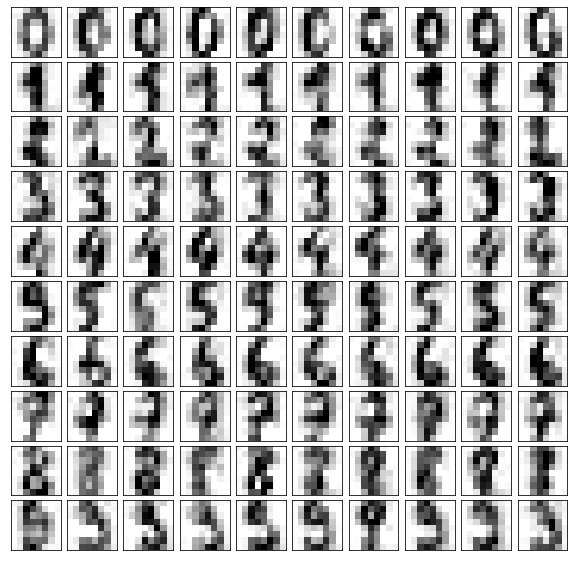

In [114]:
components = pca.transform(example_digits)
filtered_digits = pca.inverse_transform(components)
plot_digits(filtered_digits)